In [14]:
import pandas as pd

# Load the dataset
file_path = 'C:/VSCODE/ML/exemple/train _Re.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
# 결측값 확인
print(data.isnull().sum())

# 결측값 50%이상인 행 삭제
# 각 행의 결측값 비율 계산
row_missing_percentage = data.isnull().mean(axis=1) * 100

# 결측값 비율이 50% 이상인 행 삭제
rows_to_drop = row_missing_percentage[row_missing_percentage >= 50].index
data.drop(index=rows_to_drop, inplace=True)

# 변경된 데이터 확인
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 2. 범주형 데이터 처리
label_encoder = LabelEncoder()
data['SaleCondition'] = label_encoder.fit_transform(data['SaleCondition'])
data['SaleType'] = label_encoder.fit_transform(data['SaleType'])

data = pd.get_dummies(data, columns=['Street'], drop_first=True)  # One-hot 인코딩
data = pd.get_dummies(data, columns=['Condition1'], drop_first=True)  # One-hot 인코딩
data = pd.get_dummies(data, columns=['Condition2'], drop_first=True)  # One-hot 인코딩

In [19]:

#표준화
from sklearn.preprocessing import StandardScaler

# 수치형 데이터 열만 적기
numeric_cols = ['SalePrice']

# 표준화
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0   1          60       RL         65.0     8450   NaN      Reg         Lvl   
1   2          20       RL         80.0     9600   NaN      Reg         Lvl   
2   3          60       RL         68.0    11250   NaN      IR1         Lvl   
3   4          70       RL         60.0     9550   NaN      IR1         Lvl   
4   5          60       RL         84.0    14260   NaN      IR1         Lvl   

  Utilities LotConfig  ... Condition1_RRAn Condition1_RRNe Condition1_RRNn  \
0    AllPub    Inside  ...           False           False           False   
1    AllPub       FR2  ...           False           False           False   
2    AllPub    Inside  ...           False           False           False   
3    AllPub    Corner  ...           False           False           False   
4    AllPub       FR2  ...           False           False           False   

  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Co

In [20]:
# 필요한 열 빼고 나머지 삭제

# 필요한 열 목록
columns_to_keep = ['SaleCondition', 'SaleType', 'SalePrice']

# 필요한 열만 남기고 나머지 삭제
data = data[columns_to_keep]

# 결과 확인
print(data.head())


   SaleCondition  SaleType  SalePrice
0              4         8   0.347273
1              4         8   0.007288
2              4         8   0.536154
3              0         8  -0.515281
4              4         8   0.869843


In [25]:
# 4. 스케일링
scaler = StandardScaler()
data[['SaleCondition', 'SaleType']] = scaler.fit_transform(data[['SaleCondition', 'SaleType']])

In [26]:

from sklearn.model_selection import train_test_split

# 특성과 타겟 변수 분리
# 타겟변수는 모델이 예측해야 하는 결과값
X = data.drop(columns=['SalePrice'])  # 타겟 변수 'mpg' 제외
y = data['SalePrice']

# 데이터 분할 (훈련용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(1168, 2) (292, 2)


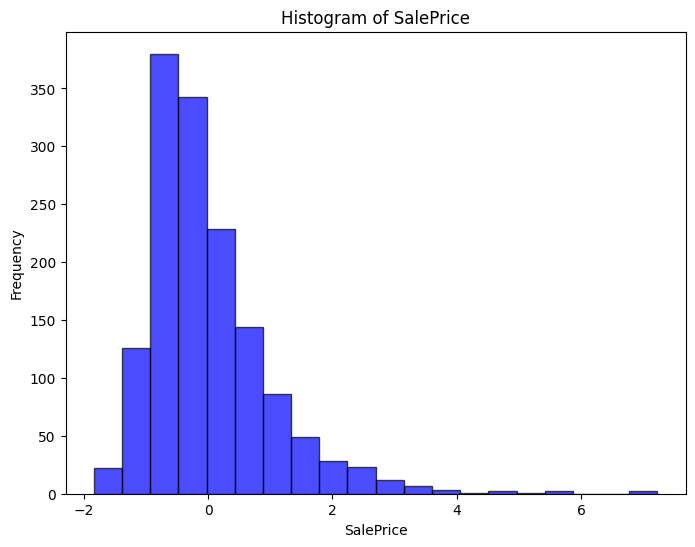

In [27]:
import matplotlib.pyplot as plt

# 히스토그램 시각화
plt.figure(figsize=(8, 6))
plt.hist(data['SalePrice'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가 및 시각화
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 1.12
R-squared: 0.08


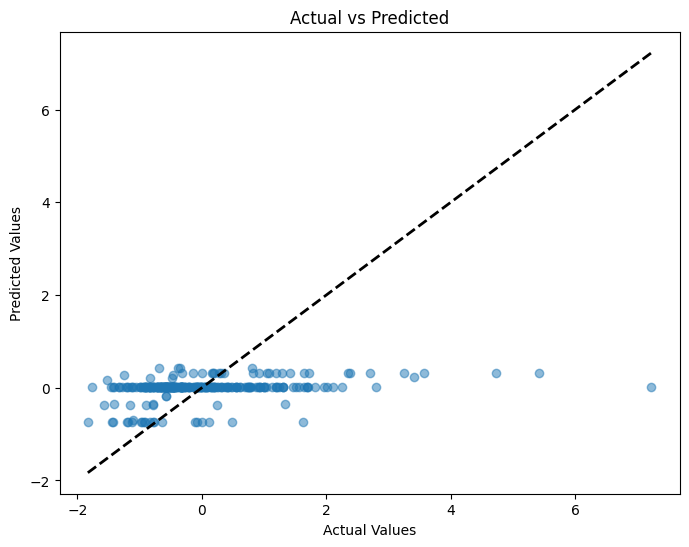

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Mean Squared Error: 1560425076.18
R-squared: 0.80


C:\Users\kweon\AppData\Local\Temp\ipykernel_20628\3929746444.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)  # 수치형 결측값 처리


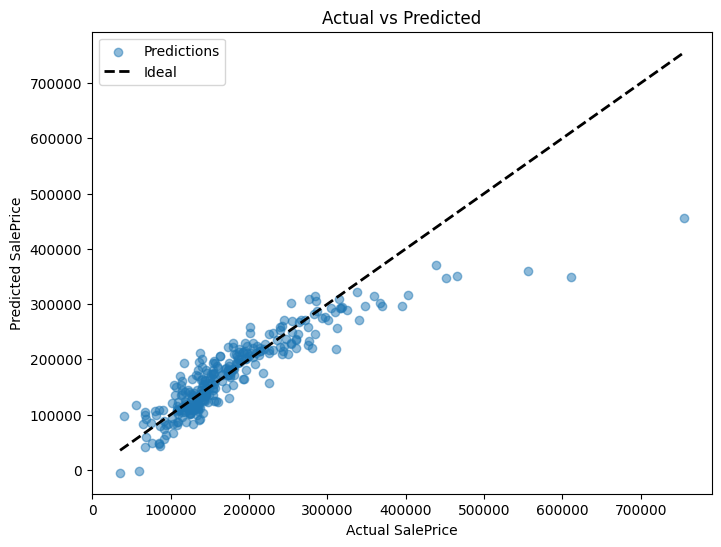

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. 데이터 로드
file_path = 'C:/VSCODE/ML/exemple/train_Re.csv'
data = pd.read_csv(file_path)

# 2. 결측값 처리
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)  # 수치형 결측값 처리
data.fillna(data.mode().iloc[0], inplace=True)  # 범주형 결측값 처리

# 3. 범주형 데이터 처리
label_encoder = LabelEncoder()
categorical_cols = ['SaleCondition', 'SaleType', 'MSZoning']  # 주요 범주형 열
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# 4. 주요 특성 선택
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
                     'SaleCondition', 'SaleType', 'SalePrice']
data = data[selected_features]

# 5. 스케일링
scaler = StandardScaler()
data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']] = scaler.fit_transform(
    data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]
)

# 6. 데이터 분리
X = data.drop('SalePrice', axis=1)  # 특성
y = data['SalePrice']  # 타겟 변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 모델 학습 및 평가
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 평가 지표
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# 8. 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal")
plt.title("Actual vs Predicted")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.legend()
plt.show()


Top features correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


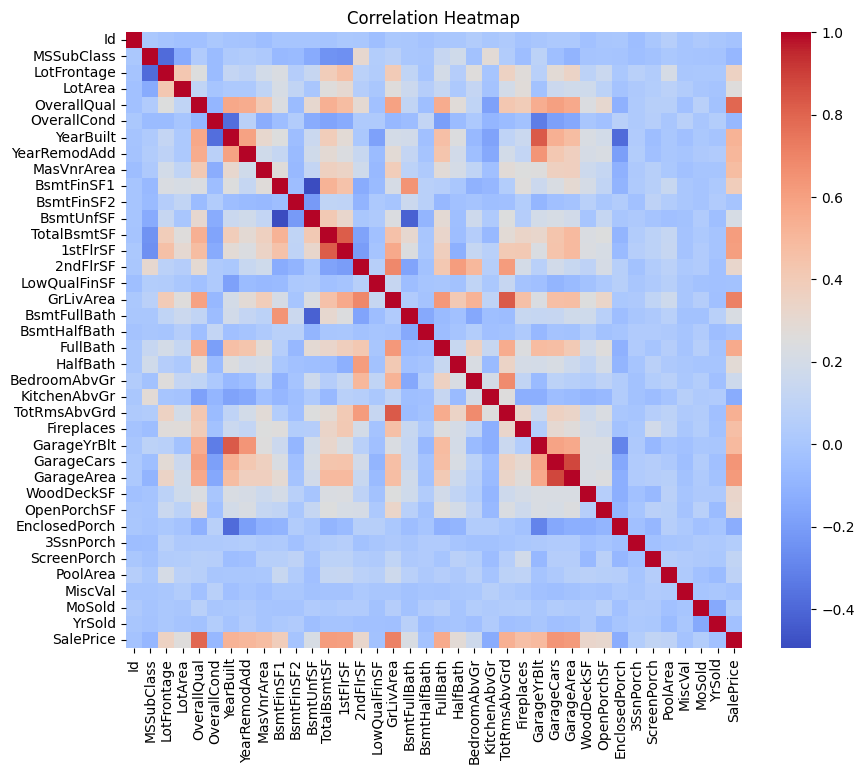

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

# 데이터 로드
file_path = 'C:/VSCODE/ML/exemple/train_Re.csv'
house_data = pd.read_csv(file_path)

# 수치형 변수만 선택
numeric_features = house_data.select_dtypes(include=['int64', 'float64'])

# SalePrice와의 상관계수 계산
correlation_matrix = numeric_features.corr()
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)

# 상위 10개 특성 출력
print("Top features correlated with SalePrice:")
print(saleprice_corr.head(10))

# 상관계수 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()
